In [51]:
# importation des bibliotheque

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [5]:
# importation du dataset
df=pd.read_csv("segmentattion.txt", delimiter="\t")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

## analyse exploratoire de données
### objectif :
.Comprendre du mieux nos données
.Developper une premiere stratégie de modelisation

### checklist de base
### Analyse de forme:
.La variable a predire (variable target):

.Ligne et colonnes: (2240 lignes, 29 colonnes)

.types de variable: 3 variables qualitatives et 26 variable quantitatives

.Analyse de valeurs manquantes: 24 valeurs manquantes dans la variable INCOME

### Analyse de fond:
.Visualisation de la target: pas de target 

.Signification des variables:n la variables Dt_Customer considere comme une varible qualitative mais ne peut etre visualiser besoin d etre normaliser


visualisation des differente variables (quantitative et qualitative)

.Relation Variables /Target:

## analyse plus detaillé
.Rélation variable/variable
.analyse des valeures manquantes

## hypothese nulle(HO):

##conclusion initiale


### Analyse de forme:

In [6]:
df.shape

(2240, 29)

In [7]:
#combien de types de variables
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

In [8]:
# valeures manques
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [32]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

### Analyse de fond 

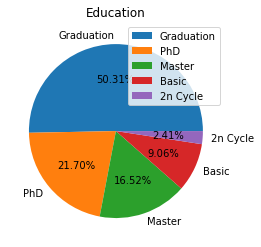

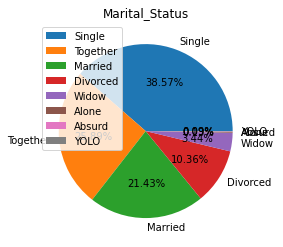

In [14]:
# VISUALISATION DES VARIABLES Qualitatives
for col in df.select_dtypes(include=object):
    if col not in 'Dt_Customer':
        plt.figure()
        plt.pie(df[col].value_counts(), autopct= "%1.2f%%", labels=df[col].unique())
        plt.title(col)
        plt.legend()
   

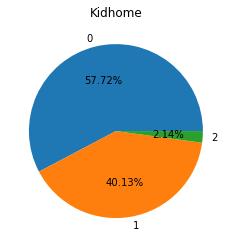

In [27]:
plt.pie(df['Kidhome'].value_counts(), autopct= "%1.2f%%", labels=df['Kidhome'].unique());
plt.title('Kidhome');

<Figure size 432x288 with 0 Axes>

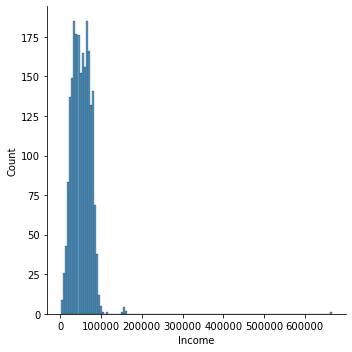

In [20]:
for col in df.select_dtypes(include=float):
    plt.figure()
    sns.displot(df[col])
 

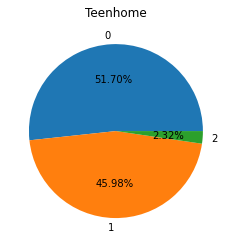

In [28]:

plt.pie(df['Teenhome'].value_counts(), autopct= "%1.2f%%", labels=df['Teenhome'].unique());
plt.title('Teenhome');
 

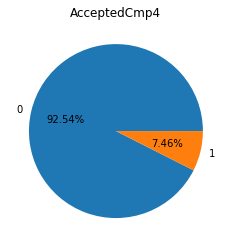

In [34]:
plt.pie(df['AcceptedCmp4'].value_counts(), autopct= "%1.2f%%", labels=df['AcceptedCmp4'].unique());
plt.title('AcceptedCmp4');


In [ ]:
#92% des clients ont accepté l'offre lors de la 4ème campagne et 7.46% 
#93% des clients ont accepté l'offre lors de la 1ème campagne et 6.43% 
#

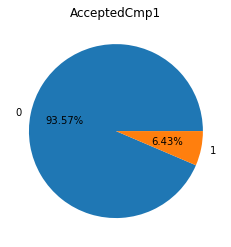

In [36]:
plt.pie(df['AcceptedCmp1'].value_counts(), autopct= "%1.2f%%", labels=df['AcceptedCmp1'].unique());
plt.title('AcceptedCmp1');

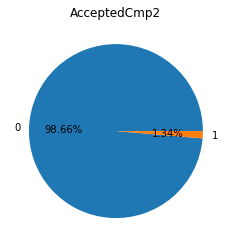

In [37]:
plt.pie(df['AcceptedCmp2'].value_counts(), autopct= "%1.2f%%", labels=df['AcceptedCmp2'].unique());
plt.title('AcceptedCmp2');

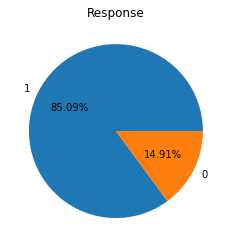

In [41]:
plt.pie(df['Response'].value_counts(), autopct= "%1.2f%%", labels=df['Response'].unique());
plt.title('Response');

<ipython-input-47-95597d04513e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


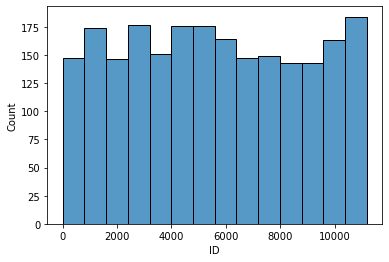

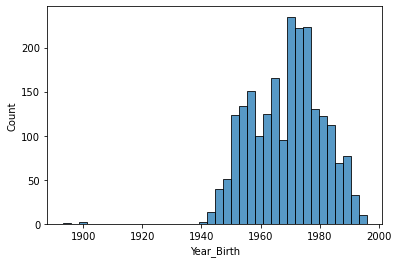

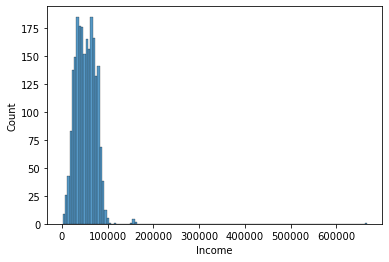

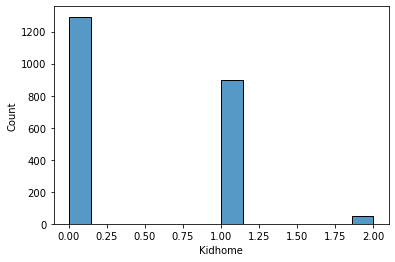

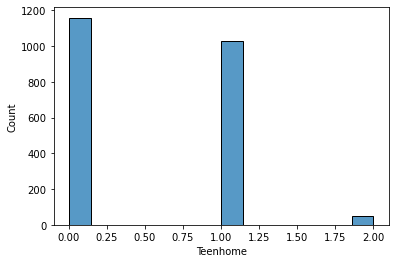

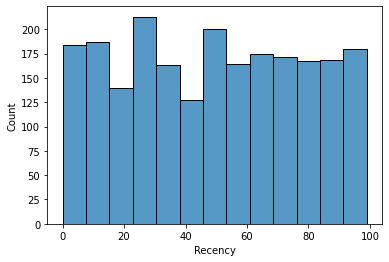

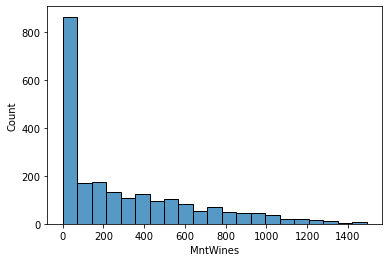

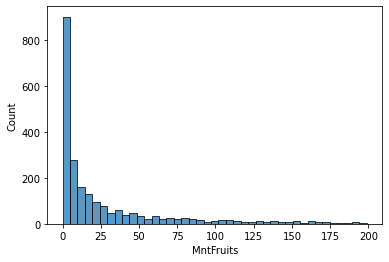

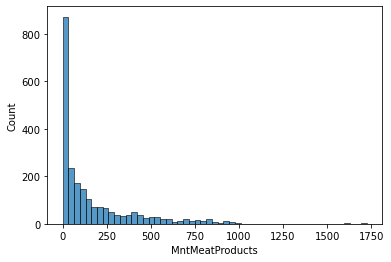

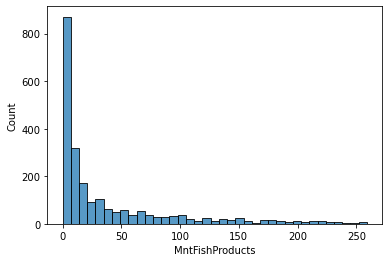

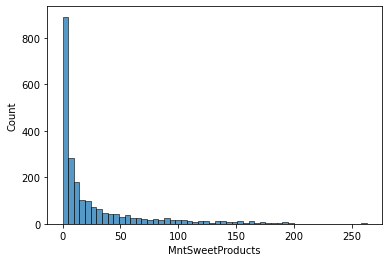

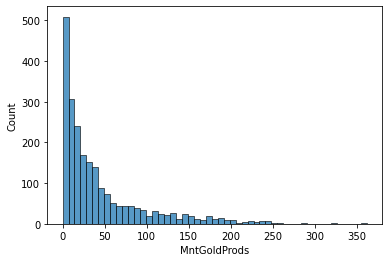

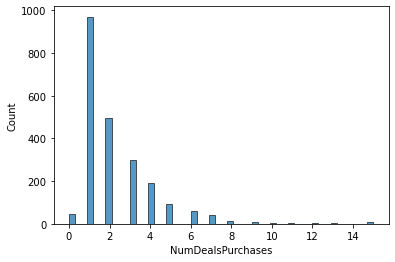

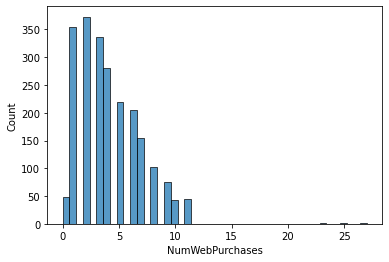

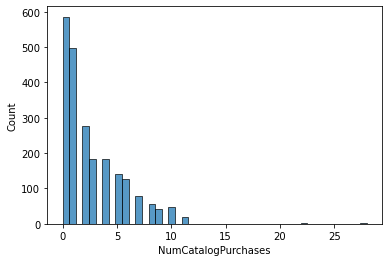

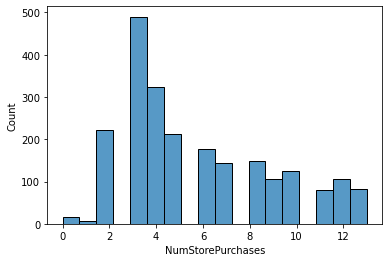

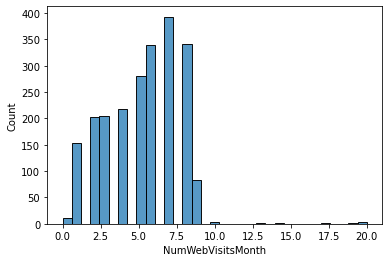

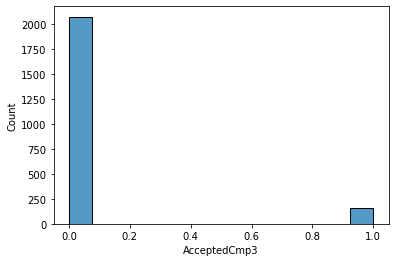

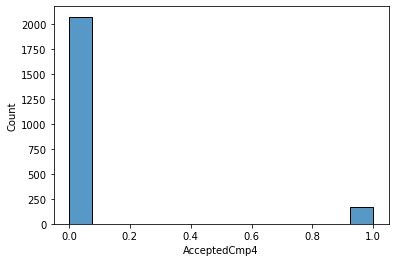

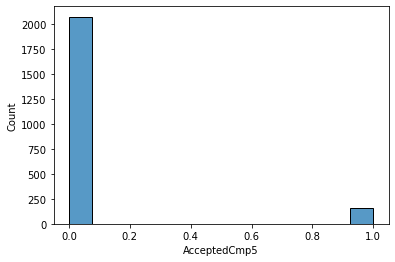

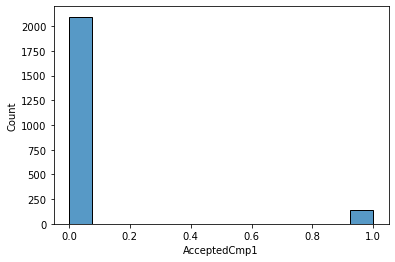

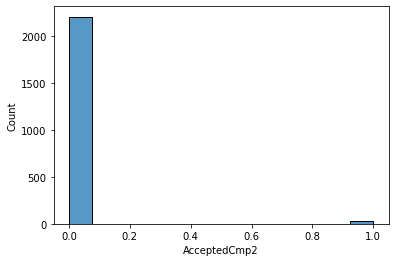

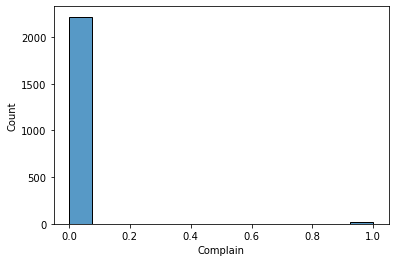

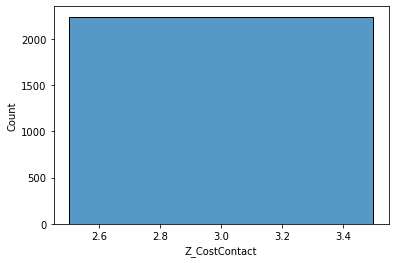

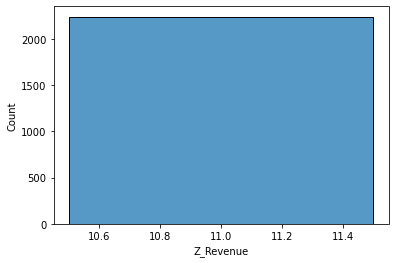

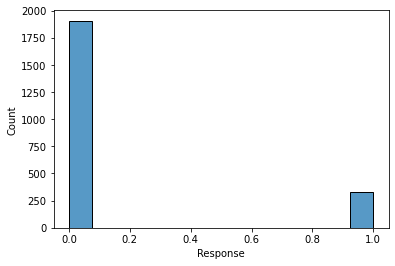

In [47]:
for col in df.select_dtypes(np.number):
    plt.figure()
    sns.histplot(df[col])

# preproccesing


In [59]:
data=df.copy()
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [49]:
### encodage des variables
#normalisons les variables z_costcontact et z_revenu


In [62]:
lb_make = LabelEncoder()
df = data
for col in data.select_dtypes(include=object):
    df[col] = lb_make.fit_transform(data[col])

In [63]:
data

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
0      5524        1957          2               4  58138.0        0   
1      2174        1954          2               4  46344.0        1   
2      4141        1965          2               5  71613.0        0   
3      6182        1984          2               5  26646.0        1   
4      5324        1981          4               3  58293.0        1   
...     ...         ...        ...             ...      ...      ...   
2235  10870        1967          2               3  61223.0        0   
2236   4001        1946          4               5  64014.0        2   
2237   7270        1981          2               2  56981.0        0   
2238   8235        1956          3               5  69245.0        0   
2239   9405        1954          4               3  52869.0        1   

      Teenhome  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0           80       58       635  ...                  7   
1            1          157       38        11  ...                  5   
2            0          444       26       426  ...                  4   
3            0          199       26        11  ...                  6   
4            0          390       94       173  ...                  5   
...        ...          ...      ...       ...  ...                ...   
2235         1          272       46       709  ...                  5   
2236         1          207       56       406  ...                  7   
2237         0          521       91       908  ...                  6   
2238         1          500        8       428  ...                  3   
2239         1          319       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

ValueError: Expected 2D array, got 1D array instead:
array=[3. 3. 3. ... 3. 3. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.